# Initialize

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# Load data

In [2]:
alldata = np.empty(shape=[0, 441])
print(alldata.shape)
paths = glob('data/ecg_beats/*.csv')
for path in paths:
    print('Loading ', path)
    csvrows = np.loadtxt(path, delimiter=',')
    alldata = np.append(alldata, csvrows, axis=0)

(0, 441)
Loading  data/ecg_beats\100_MLII.csv
Loading  data/ecg_beats\100_V5.csv
Loading  data/ecg_beats\101_MLII.csv
Loading  data/ecg_beats\101_V1.csv
Loading  data/ecg_beats\102_V2.csv
Loading  data/ecg_beats\102_V5.csv
Loading  data/ecg_beats\103_MLII.csv
Loading  data/ecg_beats\103_V2.csv
Loading  data/ecg_beats\104_V2.csv
Loading  data/ecg_beats\104_V5.csv
Loading  data/ecg_beats\105_MLII.csv
Loading  data/ecg_beats\105_V1.csv
Loading  data/ecg_beats\106_MLII.csv
Loading  data/ecg_beats\106_V1.csv
Loading  data/ecg_beats\107_MLII.csv
Loading  data/ecg_beats\107_V1.csv
Loading  data/ecg_beats\108_MLII.csv
Loading  data/ecg_beats\108_V1.csv
Loading  data/ecg_beats\109_MLII.csv
Loading  data/ecg_beats\109_V1.csv
Loading  data/ecg_beats\111_MLII.csv
Loading  data/ecg_beats\111_V1.csv
Loading  data/ecg_beats\112_MLII.csv
Loading  data/ecg_beats\112_V1.csv
Loading  data/ecg_beats\113_MLII.csv
Loading  data/ecg_beats\113_V1.csv
Loading  data/ecg_beats\114_MLII.csv
Loading  data/ecg_beat

In [10]:
# Training dataset.
df = pd.DataFrame(alldata)
samples = df.values[:, :-1]
labels = df.values[:, -1].astype(int)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.130905,0.131454,0.130631,0.129267,0.128017,0.126851,0.125027,0.122043,0.118822,0.117331,...,0.114652,0.116601,0.118935,0.120431,0.121332,0.122647,0.124825,0.126954,0.127406,0.0
1,0.106514,0.109153,0.110475,0.110193,0.109413,0.109974,0.112296,0.114677,0.115048,0.112988,...,0.139405,0.138211,0.137887,0.136748,0.134045,0.131215,0.130648,0.132783,0.135574,0.0
2,0.154560,0.153930,0.154684,0.155682,0.154846,0.151403,0.146613,0.142786,0.141473,0.142185,...,0.191680,0.193266,0.196205,0.199426,0.201181,0.201155,0.200892,0.202630,0.207724,0.0
3,0.124133,0.125057,0.125313,0.124085,0.122701,0.123127,0.125495,0.127740,0.127756,0.125653,...,0.164667,0.166985,0.167409,0.164824,0.160883,0.158848,0.160759,0.166089,0.172976,0.0
4,0.090779,0.090632,0.092550,0.096349,0.100400,0.103149,0.104268,0.104286,0.103429,0.101189,...,0.155029,0.152663,0.151605,0.152286,0.154061,0.155617,0.156006,0.155703,0.156151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,0.209504,0.208495,0.200610,0.187158,0.170027,0.152015,0.137309,0.130206,0.132756,0.142896,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
199946,0.203448,0.194580,0.181881,0.169463,0.159673,0.152096,0.144803,0.136434,0.127872,0.122304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
199947,0.157062,0.144320,0.124790,0.103955,0.087303,0.078184,0.076656,0.079264,0.082030,0.083893,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
199948,0.158392,0.155538,0.154273,0.152485,0.150239,0.150760,0.157214,0.168645,0.179898,0.185122,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# Visualize data

In [12]:
C0 = np.argwhere(labels == 0).flatten()
C1 = np.argwhere(labels == 1).flatten()
C2 = np.argwhere(labels == 2).flatten()
C3 = np.argwhere(labels == 3).flatten()
C4 = np.argwhere(labels == 4).flatten()

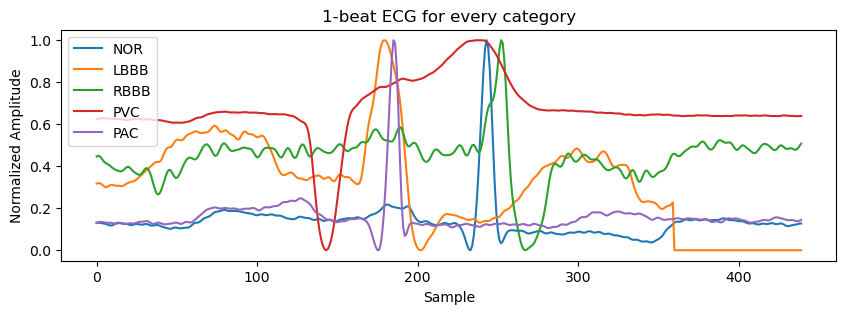

In [13]:
plt.figure(figsize=(10,3))

plt.plot(samples[C0, :][0], label="NOR") # Display first normal beat.
plt.plot(samples[C1, :][0], label="LBBB") # Display first LBBB beat.
plt.plot(samples[C2, :][0], label="RBBB") # Display first RBBB beat.
plt.plot(samples[C3, :][0], label="PVC") # Display first PVC beat.
plt.plot(samples[C4, :][0], label="PAC") # Display first PAC beat.
plt.legend()
plt.title("1-beat ECG for every category")
plt.ylabel("Normalized Amplitude")
plt.xlabel("Sample")
plt.show()

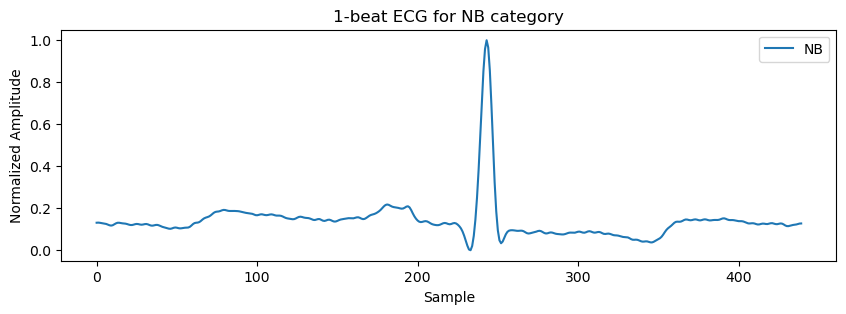

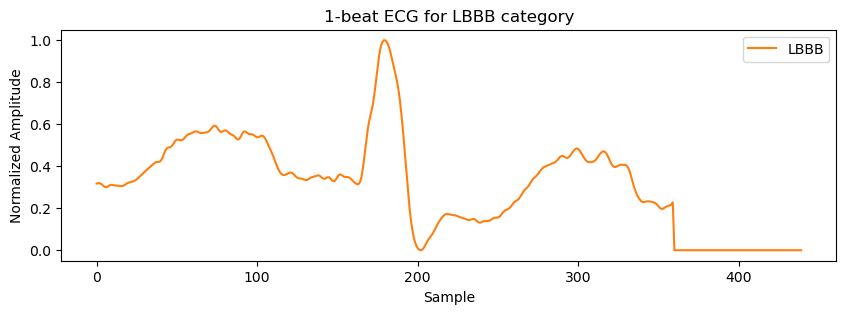

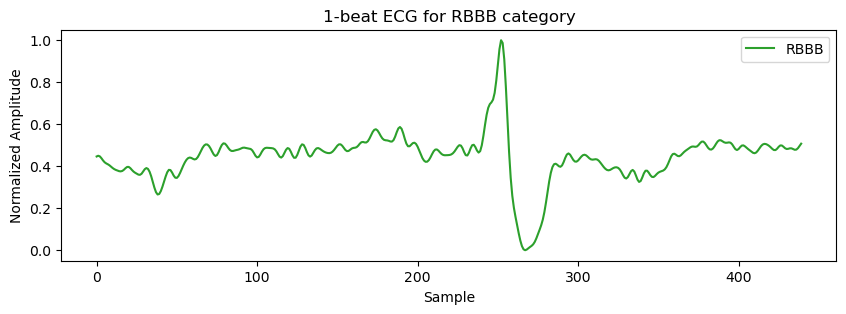

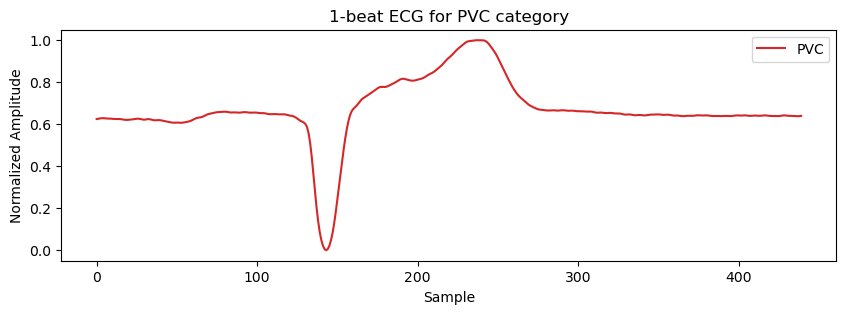

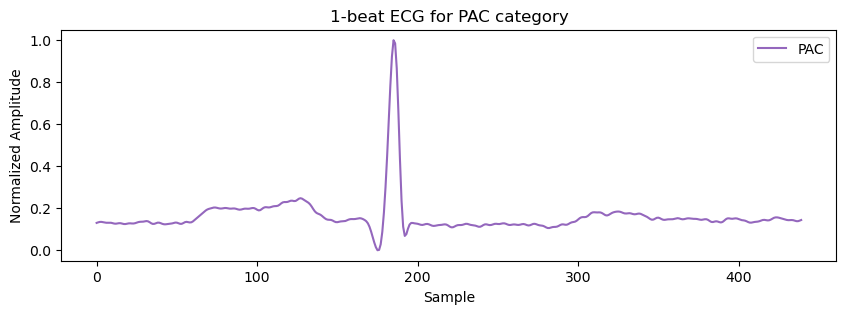

In [14]:
for cid in [C0, C1, C2, C3, C4]:
    if cid is C0:
        label = "NB"
        tab = 'tab:blue'
    elif cid is C1:
        label = "LBBB"
        tab = 'tab:orange'
    elif cid is C2:
        label = "RBBB"
        tab = 'tab:green'
    elif cid is C3:
        label = "PVC"
        tab = 'tab:red'
    elif cid is C4:
        label = "PAC"  
        tab = 'tab:purple' 

    plt.figure(figsize=(10,3))
    plt.plot(samples[cid, :][0], label=label, color=tab)
    plt.legend()
    plt.title(label="1-beat ECG for " + label + " category")
    plt.ylabel("Normalized Amplitude")
    plt.xlabel("Sample")
    plt.show()

# Class distribution

0.0    149968
1.0     16138
2.0     14500
3.0     14256
4.0      5088
Name: 440, dtype: int64


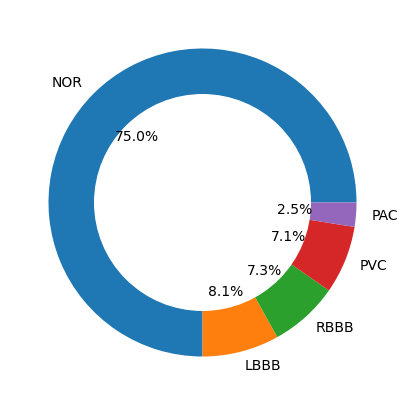

In [17]:
per_class = df[df.shape[1]-1].value_counts()
print(per_class)

plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['NOR','LBBB','RBBB','PVC','PAC'], colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
df_0 = (df[df[df.shape[1]-1]==0]).sample(n=16396,random_state=42)
df_1 = (df[df[df.shape[1]-1]==1])
df_2 = (df[df[df.shape[1]-1]==2])
df_3 = (df[df[df.shape[1]-1]==3])
df_4 = (df[df[df.shape[1]-1]==4])

df = pd.concat([df_0, df_1, df_2, df_3, df_4], ignore_index=True)

0.0    16396
1.0    16138
2.0    14500
3.0    14256
4.0     5088
Name: 440, dtype: int64


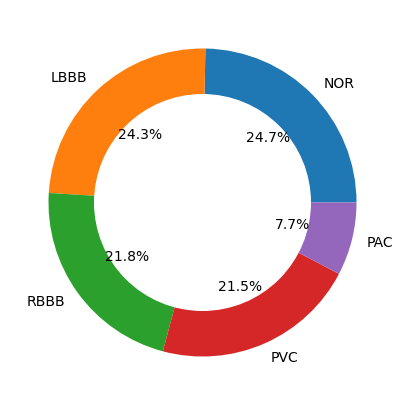

In [19]:
per_class = df[df.shape[1]-1].value_counts()
print(per_class)

plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['NOR','LBBB','RBBB','PVC','PAC'], colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Split dataset

In [26]:
train, test = train_test_split(df, test_size=0.20, shuffle=True)

with open('./data/0.8_train.csv', "wb") as fin:
    np.savetxt(fin, train, delimiter=",", fmt='%f')

with open('./data/0.2_test.csv', "wb") as fin:
    np.savetxt(fin, test, delimiter=",", fmt='%f')

print("train_data : ", np.shape(train))
print("test_data  : ", np.shape(test))

train_data :  (53102, 441)
test_data  :  (13276, 441)


In [27]:
# 0.0 Normal beat
# 1.0 LBBB beat
# 2.0 RBBB beat
# 3.0 PVC beat
# 4.0 PAC beat

print('data train per class')
print(train[440].value_counts())
print('---------------------------------')
print('data test per class')
print(test[440].value_counts())

data train per class
0.0    13152
1.0    12938
2.0    11508
3.0    11421
4.0     4083
Name: 440, dtype: int64
---------------------------------
data test per class
0.0    3244
1.0    3200
2.0    2992
3.0    2835
4.0    1005
Name: 440, dtype: int64


In [28]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)
print(np.shape(train_y), np.shape(test_y))

(53102, 5) (13276, 5)


In [29]:
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

(53102, 440, 1) (13276, 440, 1)
